In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA ULANG (Supaya 'df' muncul lagi)
# Mengambil file dari folder input Kaggle
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

# 2. FILTER ULANG (Supaya indeksnya cocok dengan yang kita kerjakan tadi)
# Kita buat data_cluster lagi dari awal biar aman
fitur_pilihan = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']
data_cluster = df[fitur_pilihan].copy()
data_cluster = data_cluster.dropna()
data_cluster = data_cluster[data_cluster['Income'] < 200000] # Hapus outlier Gaji Raksasa

# 3. KODE YANG TADI ERROR (Sekarang pasti bisa)
# Kita ambil data belanja dari df asli yang indeksnya sama dengan data_cluster
df_temp = df.loc[data_cluster.index]

data_cluster['Total_Spend'] = (
    df_temp['MntWines'] + 
    df_temp['MntMeatProducts'] + 
    df_temp['MntFruits'] + 
    df_temp['MntFishProducts'] + 
    df_temp['MntSweetProducts'] + 
    df_temp['MntGoldProds']
)

print("Sukses! Data 'df' sudah kembali dan kolom 'Total_Spend' berhasil dibuat.")
print(data_cluster[['Income', 'Total_Spend']].head())

Sukses! Data 'df' sudah kembali dan kolom 'Total_Spend' berhasil dibuat.
    Income  Total_Spend
0  58138.0         1617
1  46344.0           27
2  71613.0          776
3  26646.0           53
4  58293.0          422


In [11]:
# 5. Standarisasi Data (Agar semua angka punya skala setara)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Hasilnya adalah angka-angka desimal yang siap dimakan mesin
print("Data sudah distandarisasi.")

Data sudah distandarisasi.


In [12]:
# 6. Jalankan K-Means dengan 3 Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Masukkan label kelompok (0, 1, 2) kembali ke data asli
data_cluster['Cluster'] = clusters

print("Selesai! Setiap pelanggan sudah punya label kelompoknya.")

Selesai! Setiap pelanggan sudah punya label kelompoknya.


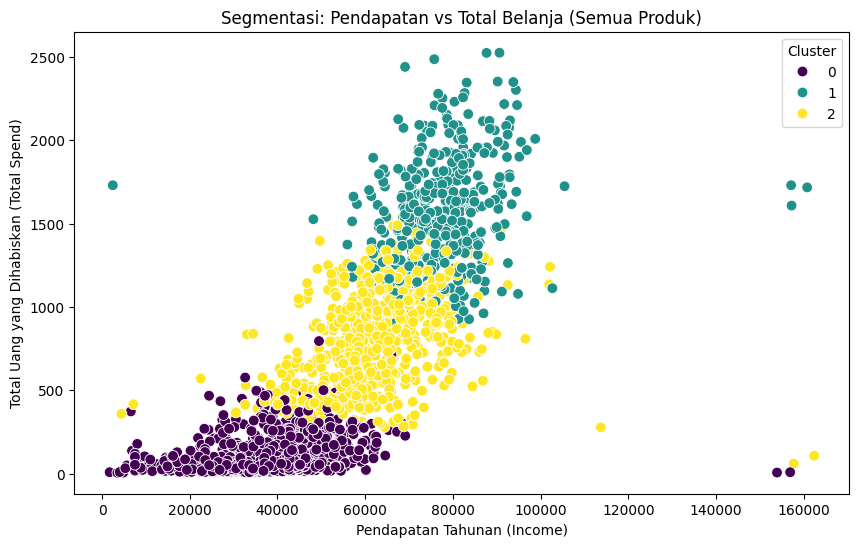

In [13]:
# 2. Plotting Income vs TOTAL Belanja
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=data_cluster, 
    x='Income', 
    y='Total_Spend', 
    hue='Cluster', 
    palette='viridis', 
    s=60 # Ukuran titik
)

plt.title('Segmentasi: Pendapatan vs Total Belanja (Semua Produk)')
plt.xlabel('Pendapatan Tahunan (Income)')
plt.ylabel('Total Uang yang Dihabiskan (Total Spend)')
plt.legend(title='Cluster')
plt.show()

In [14]:
# 8. Cek Rata-rata Profil Tiap Cluster
summary = data_cluster.groupby('Cluster').mean().round(0)
print(summary)

          Income  Recency  MntWines  MntMeatProducts  NumWebPurchases  \
Cluster                                                                 
0        35210.0     49.0      48.0             26.0              2.0   
1        77894.0     52.0     740.0            540.0              5.0   
2        62197.0     47.0     441.0            161.0              6.0   

         NumStorePurchases  Total_Spend  
Cluster                                  
0                      3.0        111.0  
1                      8.0       1575.0  
2                      8.0        789.0  


/tmp/ipykernel_55/3251219907.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster, x='Cluster', y=kolom, ax=axes[i//2, i%2], palette='viridis')
/tmp/ipykernel_55/3251219907.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster, x='Cluster', y=kolom, ax=axes[i//2, i%2], palette='viridis')
/tmp/ipykernel_55/3251219907.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cluster, x='Cluster', y=kolom, ax=axes[i//2, i%2], palette='viridis')
/tmp/ipykernel_55/3251219907.py:13: FutureWarning: 

Passing 

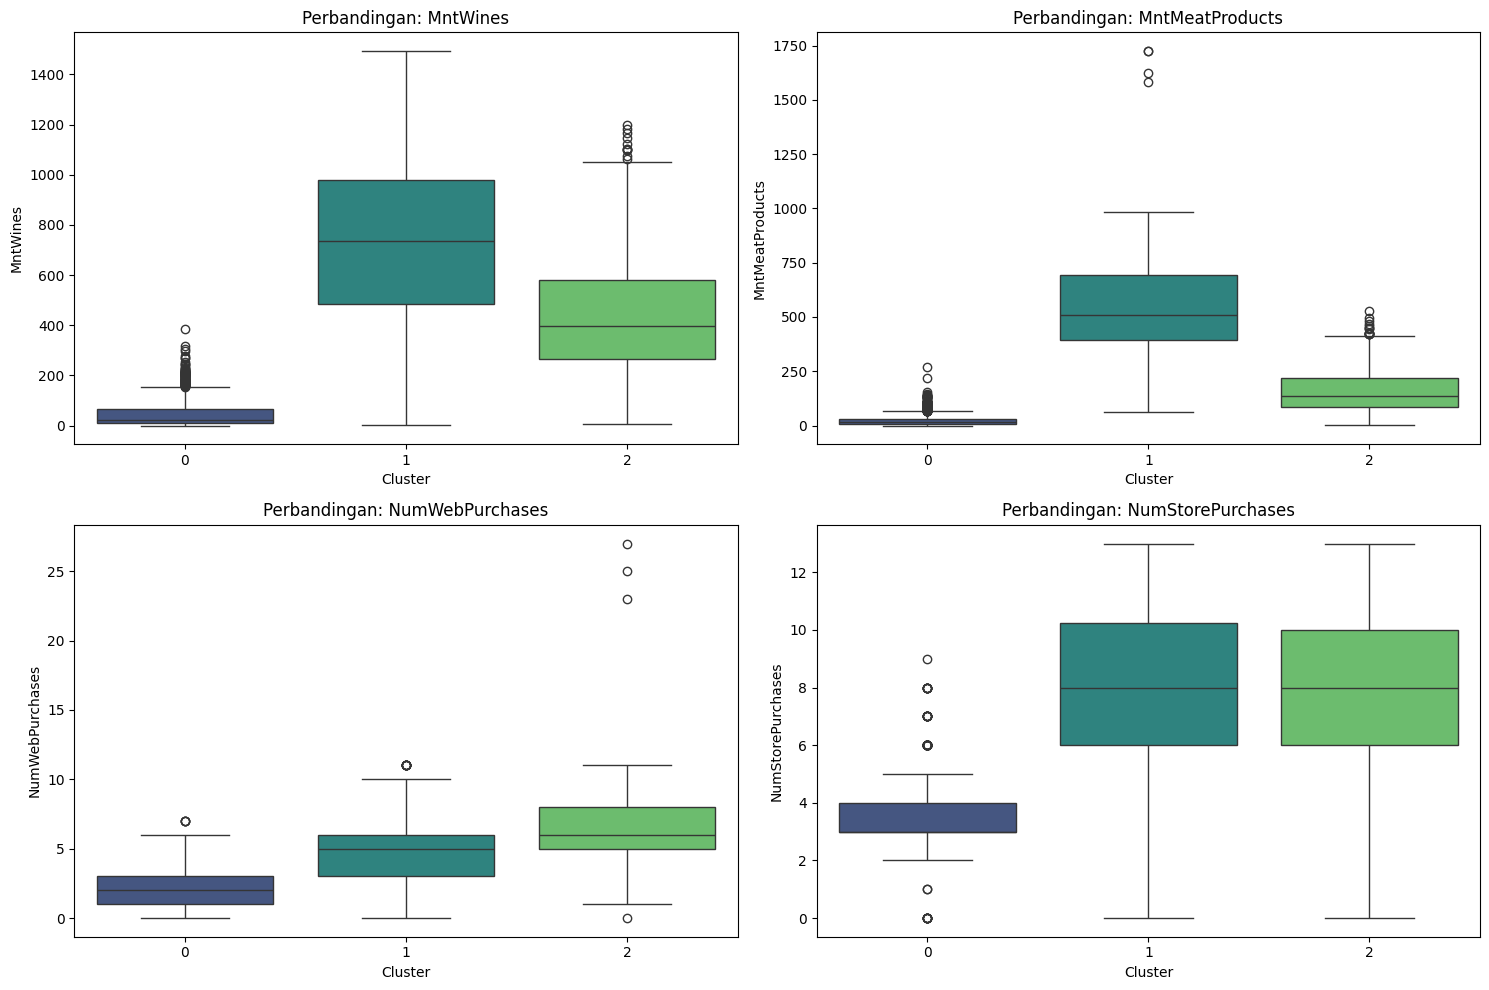

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan data_cluster sudah ada (dari langkah sebelumnya)
# Kita pilih 4 hal yang mau dibandingkan
kolom_penting = ['MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']

# Siapkan kanvas gambar (2 baris x 2 kolom)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gambar Boxplot otomatis
for i, kolom in enumerate(kolom_penting):
    sns.boxplot(data=data_cluster, x='Cluster', y=kolom, ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(f'Perbandingan: {kolom}')

plt.tight_layout()
plt.show()

/tmp/ipykernel_55/2200183590.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


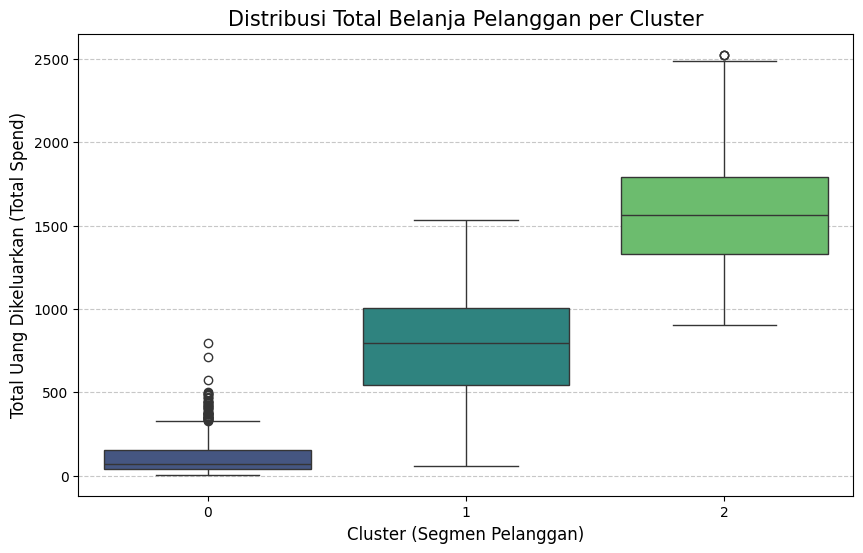

In [18]:
# 1. Pastikan kolom Total_Spend sudah terhitung (Jaga-jaga)
# Kita jumlahkan ulang agar pasti benar
df_analisis = df.loc[data_cluster.index].copy()
df_analisis['Cluster'] = data_cluster['Cluster']

df_analisis['Total_Spend'] = (
    df_analisis['MntWines'] + 
    df_analisis['MntFruits'] + 
    df_analisis['MntMeatProducts'] + 
    df_analisis['MntFishProducts'] + 
    df_analisis['MntSweetProducts'] + 
    df_analisis['MntGoldProds']
)

# 2. Gambar Boxplot Tunggal
plt.figure(figsize=(10, 6))

# Kita urutkan agar grafiknya rapi (dari belanja dikit ke banyak)
# Ini trik visual agar terlihat seperti "Tangga"
order_by_spend = df_analisis.groupby('Cluster')['Total_Spend'].median().sort_values().index

sns.boxplot(
    data=df_analisis, 
    x='Cluster', 
    y='Total_Spend', 
    order=order_by_spend, # Urutkan otomatis
    palette='viridis'
)

plt.title('Distribusi Total Belanja Pelanggan per Cluster', fontsize=15)
plt.xlabel('Cluster (Segmen Pelanggan)', fontsize=12)
plt.ylabel('Total Uang Dikeluarkan (Total Spend)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/tmp/ipykernel_55/2527263160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_55/2527263160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_55/2527263160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_55/2527263160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


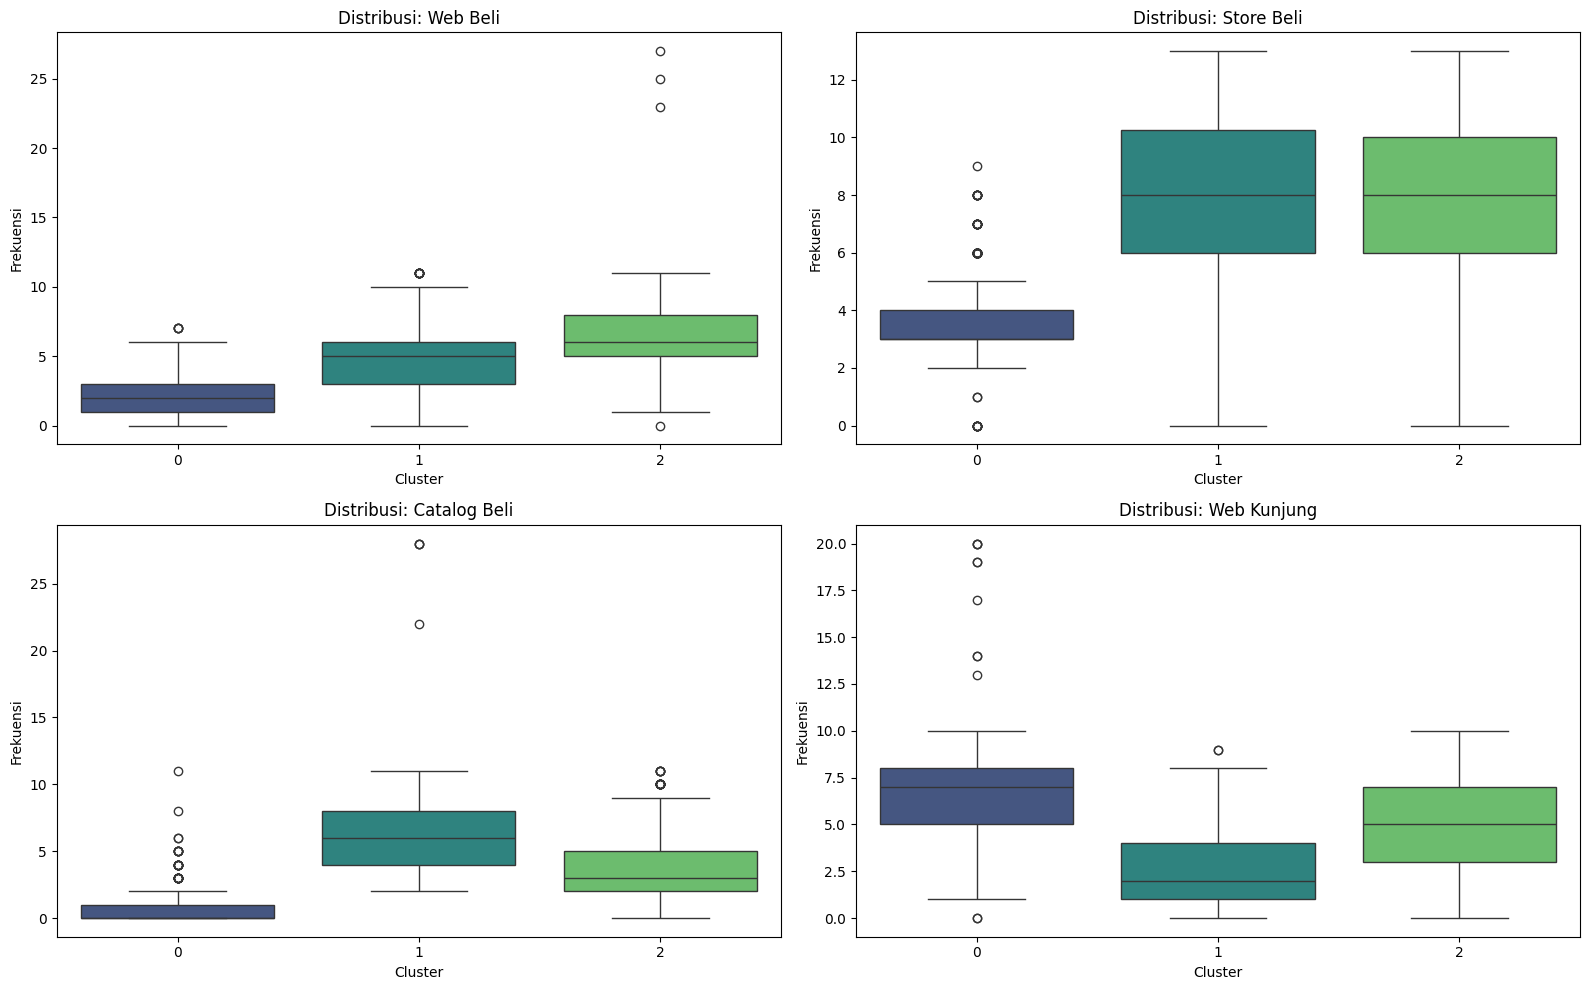

In [16]:
# Daftar kolom Saluran (Channels)
channel_cols = [
    'NumWebPurchases',      # Jumlah Beli di Web
    'NumStorePurchases',    # Jumlah Beli di Toko
    'NumCatalogPurchases',  # Jumlah Beli via Katalog
    'NumWebVisitsMonth'     # Jumlah Kunjungan Web (Cuma lihat-lihat)
]

# Pastikan menggunakan data yang ada kolom Clusternya
df_analisis = df.loc[data_cluster.index].copy()
df_analisis['Cluster'] = data_cluster['Cluster']

# Siapkan kanvas 2 Baris x 2 Kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Loop menggambar
for i, col in enumerate(channel_cols):
    sns.boxplot(
        data=df_analisis, 
        x='Cluster', 
        y=col, 
        ax=axes[i//2, i%2], 
        palette='viridis'
    )
    
    # Judul yang lebih cantik
    judul = col.replace('Num', '').replace('Purchases', ' Beli').replace('VisitsMonth', ' Kunjung')
    axes[i//2, i%2].set_title(f'Distribusi: {judul}')
    axes[i//2, i%2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

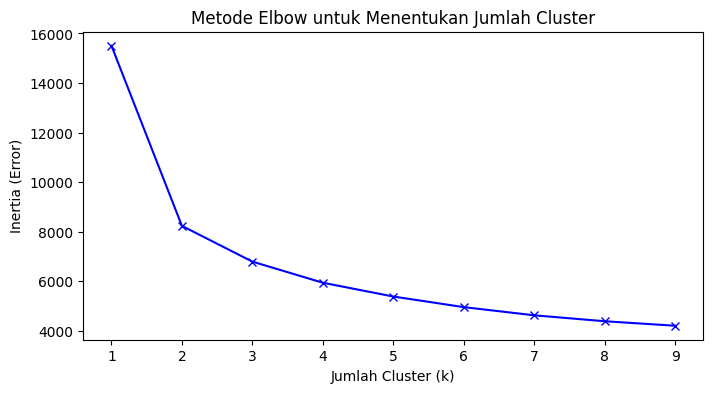

Silhouette Score untuk 3 Cluster: 0.347


In [17]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- EVALUASI 1: ELBOW METHOD (Mencari jumlah cluster terbaik) ---
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit(data_scaled)
    inertia.append(kmeans_test.inertia_)

# Gambar Grafik Elbow
plt.figure(figsize=(8, 4))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Error)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.show()

# --- EVALUASI 2: SILHOUETTE SCORE (Menilai Kualitas) ---
# Kita hitung skor untuk model final kita (yang 3 cluster)
score = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score untuk 3 Cluster: {score:.3f}")

Sedang menghitung Elbow Method...


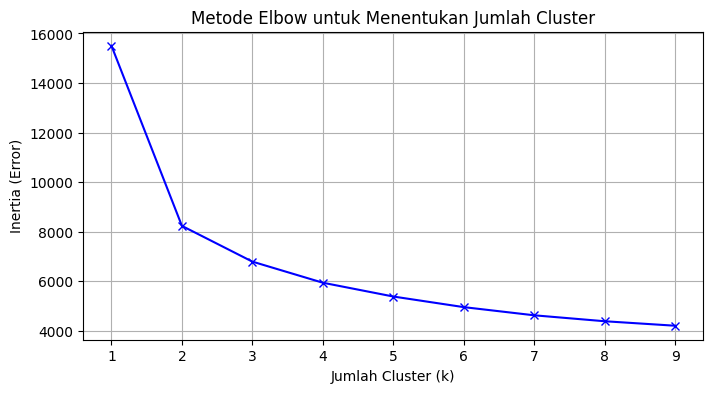

Sedang menghitung Silhouette Score...

Silhouette Score untuk 3 Cluster: 0.347


In [18]:
# --- IMPORTS (Panggil Perpustakaan Dulu) ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- EVALUASI 1: ELBOW METHOD ---
inertia = []
range_values = range(1, 10)

print("Sedang menghitung Elbow Method...")

for i in range_values:
    # Menjalankan K-Means dari 1 sampai 10 cluster
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit(data_scaled)
    inertia.append(kmeans_test.inertia_)

# Gambar Grafik Elbow
plt.figure(figsize=(8, 4))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Error)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.grid(True)
plt.show()

# --- EVALUASI 2: SILHOUETTE SCORE ---
# Hitung skor untuk model final kita (3 cluster)
# Pastikan 'clusters' dan 'data_scaled' sudah ada dari proses sebelumnya
print("Sedang menghitung Silhouette Score...")

# Kita jalankan ulang K-Means 3 Cluster biar pasti datanya ada
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_final = kmeans_final.fit_predict(data_scaled)

score = silhouette_score(data_scaled, labels_final)
print(f"\nSilhouette Score untuk 3 Cluster: {score:.3f}")

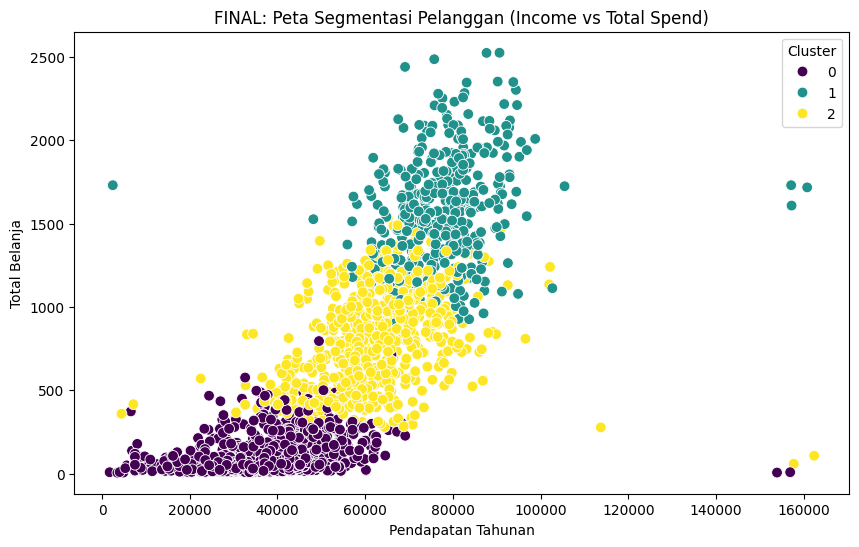

/tmp/ipykernel_55/2396850146.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


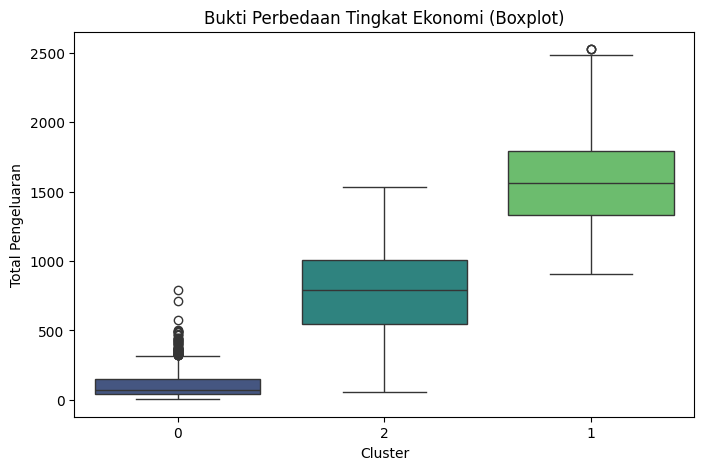

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan label cluster sudah tertempel di data (jaga-jaga)
# Kita gunakan model yang baru saja Anda tes
kmeans_final = KMeans(n_clusters=3, random_state=42)
data_cluster['Cluster'] = kmeans_final.fit_predict(data_scaled)

# --- GAMBAR 1: PETA SEBARAN (SCATTERPLOT) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_cluster, 
    x='Income', 
    y='Total_Spend', 
    hue='Cluster', 
    palette='viridis',
    s=60
)
plt.title('FINAL: Peta Segmentasi Pelanggan (Income vs Total Spend)')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Total Belanja')
plt.legend(title='Cluster')
plt.show()

# --- GAMBAR 2: PERBANDINGAN DAYA BELI (BOXPLOT) ---
plt.figure(figsize=(8, 5))
# Kita urutkan biar gambarnya rapi seperti tangga
order_by_spend = data_cluster.groupby('Cluster')['Total_Spend'].median().sort_values().index

sns.boxplot(
    data=data_cluster, 
    x='Cluster', 
    y='Total_Spend', 
    order=order_by_spend,
    palette='viridis'
)
plt.title('Bukti Perbedaan Tingkat Ekonomi (Boxplot)')
plt.ylabel('Total Pengeluaran')
plt.show()

In [21]:
from sklearn.metrics import davies_bouldin_score

# Hitung skor
db_score = davies_bouldin_score(data_scaled, clusters)

print(f"Davies-Bouldin Index: {db_score:.3f}")

if db_score < 1.0:
    print("Kesimpulan: Sangat Bagus (Klaster terpisah sangat rapi).")
elif db_score < 2.0:
    print("Kesimpulan: Cukup Baik (Standar wajar).")
else:
    print("Kesimpulan: Kurang optimal (Masih banyak tumpang tindih).")

Davies-Bouldin Index: 1.400
Kesimpulan: Cukup Baik (Standar wajar).
